In [ ]:
wfrom tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
#Cargamos la data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Contexto


El Gobierno de chile solícita el etiquetado de imágenes de distintos dominios para implementar IA en su página web.

Para esto se utiliza un conjunto de datos CIFAR-10(Colección de imágenes para entrenar algoritmos de aprendizaje automático), este consta con 60000 imágenes a color con unas dimensiones de 32x32 en 10 clases las cuales serán pasadas por nombres para reconocerlas de mejor manera por lo cual serán llamadas de la siguiente manera Avión, Automovil, Pajaro, Gato,Ciervo, Perro,Rana, Caballo,Barco, Camion , con 6000 imágenes por cada una de las clases, con 50000 imágenes de entrenamiento y 10000 imágenes de pruebas

El conjunto de datos se encuentra dividido en cinco lotes de datos y un lote de prueba, cada uno de estos con 10000 imagen y el lote de prueba con 1000 imágenes las cuales son seleccionadas de manera al azar de cada clase.

In [ ]:
clases = ['Avion', 'Automovil', 'Pajaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camion']

Las etiquetas se nombraron para poder comprenderlos de mejor manera por lo cual pasaron a ser

* 0:Avion
* 1:Automovil
* 2:Pajaro
* 3:Gato
* 4:Ciervo
* 5:Perro
* 6:Rana
* 7:Caballo
* 8:Barco
* 9:Camion

En los datos la matriz numerica es de 10000x3072 en las cuales Cada fila de la matriz contiene una imagen en color de 32x32.
* Las primeras 1024 entradas contienen los valores del canal rojo
* Las siguientes 1024 el verde
* 1024 finales en azul

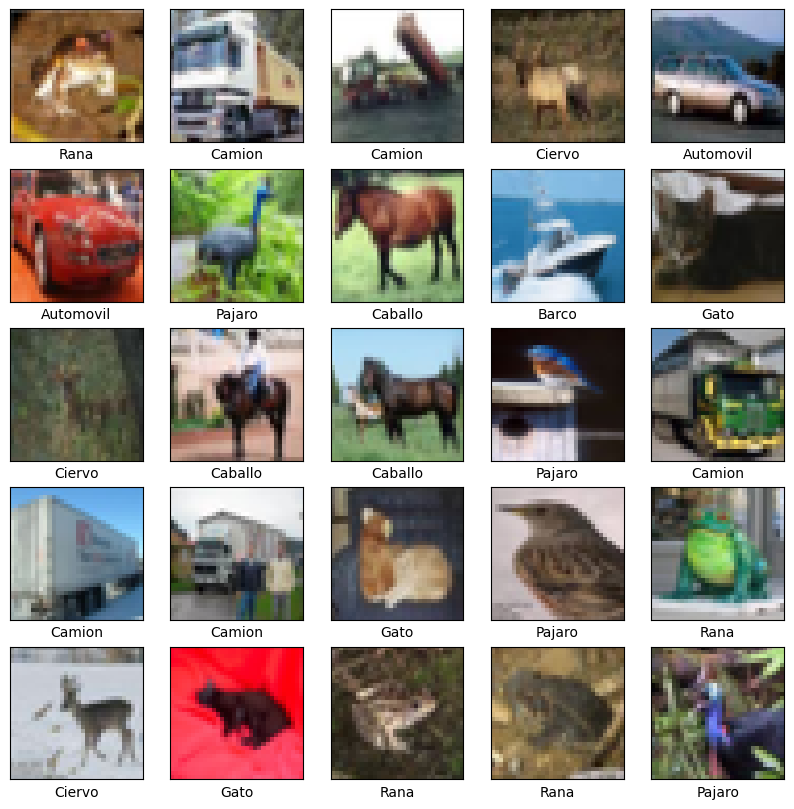

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(clases[y_train[i][0]])
plt.show()

### Data Preparation

In [ ]:
# Normalizamos los datos de imagenes pero no cambiamos la forma


x_train = x_train / 255


x_test = x_test / 255

# X / (Max (X) - Min (X)) => X / (255 - 0) = X / 255

print(x_train.shape, x_test.shape)

# Las etiquetas si debemos llevarlas a un vector one-hot

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train.shape, y_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


## Modeling

### Relu - Convulucional, Max pooling, Densa(256) y Densa(10) Sobreentrenamiento

In [ ]:
red_conv = keras.Sequential()
red_conv.add(Conv2D(256, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
#-> Primero se aplican las convoluciones, luego la función de activación
red_conv.add(MaxPool2D((2,2)))
red_conv.add(Flatten())
red_conv.add(Dense(256, activation='relu'))
red_conv.add(Dense(10, activation='softmax'))

red_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               14745856  
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,755,594
Trainable params: 14,755,594
Non-trainable params: 0
____________________________________________

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

red_conv.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

hist = red_conv.fit(
    x_train,y_train,
    batch_size=100,
    epochs=25,
    validation_data=(x_test,y_test)
)

Epoch 1/25
500/500 [==============================] - 10s 14ms/step - loss: 1.5059 - accuracy: 0.4678 - val_loss: 1.2497 - val_accuracy: 0.5597
Epoch 2/25
500/500 [==============================] - 6s 13ms/step - loss: 1.1371 - accuracy: 0.6021 - val_loss: 1.1625 - val_accuracy: 0.5884
Epoch 3/25
500/500 [==============================] - 7s 14ms/step - loss: 0.9863 - accuracy: 0.6546 - val_loss: 1.0926 - val_accuracy: 0.6190
Epoch 4/25
500/500 [==============================] - 7s 15ms/step - loss: 0.8686 - accuracy: 0.6975 - val_loss: 1.0361 - val_accuracy: 0.6424
Epoch 5/25
500/500 [==============================] - 6s 13ms/step - loss: 0.7624 - accuracy: 0.7348 - val_loss: 1.0098 - val_accuracy: 0.6551
Epoch 6/25
500/500 [==============================] - 6s 13ms/step - loss: 0.6618 - accuracy: 0.7692 - val_loss: 1.0550 - val_accuracy: 0.6474
Epoch 7/25
500/500 [==============================] - 6s 12ms/step - loss: 0.5574 - accuracy: 0.8064 - val_loss: 1.0401 - val_accuracy: 0.665

Con un batch_size de 16 en la epoca 6 ya llevaba un 80% de acertividad, decidimos bajarlo ya que al tener bastantes epocas con un Bacht_size mas bajo puede dar el mismo resultado, esto debido a que estamos trabajando con 25 epocas.

####Grafico

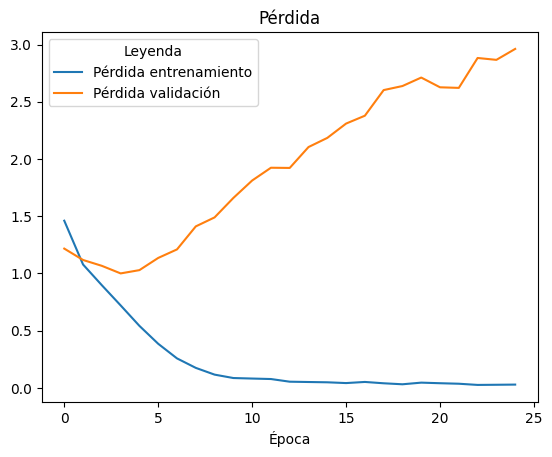

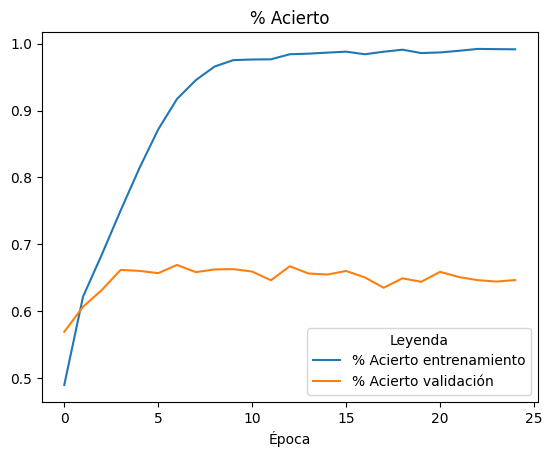

In [ ]:
plt.plot(hist.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto validación')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

Relu - Convulucional x3 , Max pooling, Densa(256) y Densa(10) Sobreentrenamiento

In [ ]:
red_conv2 = keras.Sequential()
red_conv2.add(Conv2D(256, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
red_conv2.add(Conv2D(128, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
red_conv2.add(MaxPool2D((2,2)))
red_conv2.add(Conv2D(64, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
red_conv2.add(MaxPool2D((2,2)))
red_conv2.add(Flatten())
red_conv2.add(Dense(256, activation='relu'))
red_conv2.add(Dense(10, activation='softmax'))

red_conv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

red_conv2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist2 = red_conv2.fit(
    x_train,y_train,
    batch_size=100,
    epochs=30,
    validation_data=(x_test,y_test)
)

Epoch 1/30
500/500 [==============================] - 18s 29ms/step - loss: 1.4886 - accuracy: 0.4625 - val_loss: 1.1667 - val_accuracy: 0.5905
Epoch 2/30
500/500 [==============================] - 15s 30ms/step - loss: 1.0693 - accuracy: 0.6261 - val_loss: 0.9708 - val_accuracy: 0.6628
Epoch 3/30
500/500 [==============================] - 15s 30ms/step - loss: 0.8747 - accuracy: 0.6948 - val_loss: 0.9146 - val_accuracy: 0.6823
Epoch 4/30
500/500 [==============================] - 14s 29ms/step - loss: 0.7519 - accuracy: 0.7376 - val_loss: 0.8486 - val_accuracy: 0.7117
Epoch 5/30
500/500 [==============================] - 15s 29ms/step - loss: 0.6468 - accuracy: 0.7770 - val_loss: 0.8117 - val_accuracy: 0.7230
Epoch 6/30
500/500 [==============================] - 15s 30ms/step - loss: 0.5507 - accuracy: 0.8093 - val_loss: 0.8334 - val_accuracy: 0.7186
Epoch 7/30
500/500 [==============================] - 15s 30ms/step - loss: 0.4559 - accuracy: 0.8408 - val_loss: 0.8420 - val_accuracy:

####Grafico

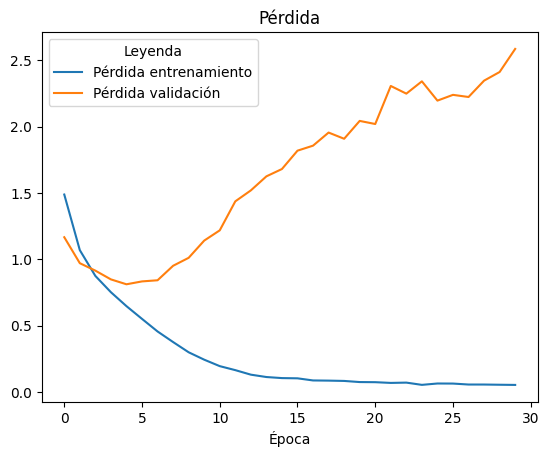

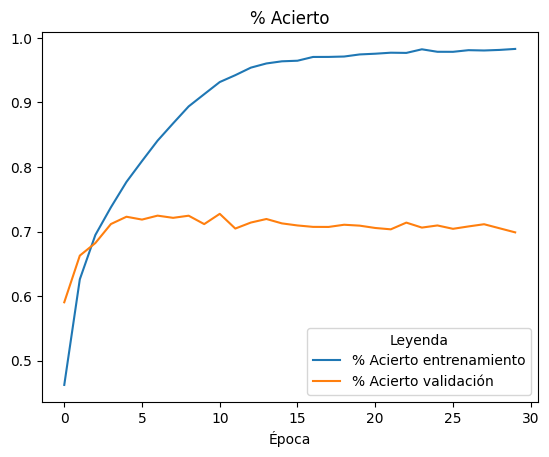

In [ ]:
plt.plot(hist2.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist2.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

plt.plot(hist2.history['accuracy'], label='% Acierto entrenamiento')
plt.plot(hist2.history['val_accuracy'], label='% Acierto validación')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

### Relu - Convulucional x3, Max pooling, Densa(256), Densa(128), Densa(10) Con 2 Dropout de 0.3 Sobreentrenamiento

In [ ]:
red_conv3 = keras.Sequential()
red_conv3.add(Conv2D(256, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
red_conv3.add(Conv2D(128, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
red_conv3.add(MaxPool2D((2,2)))
red_conv3.add(Conv2D(64, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
red_conv3.add(MaxPool2D((2,2)))
red_conv3.add(Flatten())
red_conv3.add(Dense(256, activation='relu'))
red_conv3.add(keras.layers.Dropout(0.3))
red_conv3.add(Dense(128, activation='relu'))
red_conv3.add(keras.layers.Dropout(0.3))
red_conv3.add(Dense(10, activation='softmax'))

red_conv3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)             

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

red_conv3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist3 = red_conv3.fit(
    x_train,y_train,
    batch_size=100,
    epochs=30,
    validation_data=(x_test,y_test)
)

Epoch 1/30
500/500 [==============================] - 18s 31ms/step - loss: 1.6385 - accuracy: 0.3975 - val_loss: 1.2271 - val_accuracy: 0.5575
Epoch 2/30
500/500 [==============================] - 15s 30ms/step - loss: 1.1995 - accuracy: 0.5769 - val_loss: 1.0048 - val_accuracy: 0.6500
Epoch 3/30
500/500 [==============================] - 15s 30ms/step - loss: 1.0051 - accuracy: 0.6498 - val_loss: 0.9060 - val_accuracy: 0.6891
Epoch 4/30
500/500 [==============================] - 14s 29ms/step - loss: 0.8740 - accuracy: 0.6937 - val_loss: 0.8323 - val_accuracy: 0.7106
Epoch 5/30
500/500 [==============================] - 15s 30ms/step - loss: 0.7764 - accuracy: 0.7317 - val_loss: 0.7864 - val_accuracy: 0.7227
Epoch 6/30
500/500 [==============================] - 15s 30ms/step - loss: 0.7097 - accuracy: 0.7532 - val_loss: 0.7886 - val_accuracy: 0.7282
Epoch 7/30
500/500 [==============================] - 15s 30ms/step - loss: 0.6369 - accuracy: 0.7766 - val_loss: 0.8055 - val_accuracy:

#####Grafico

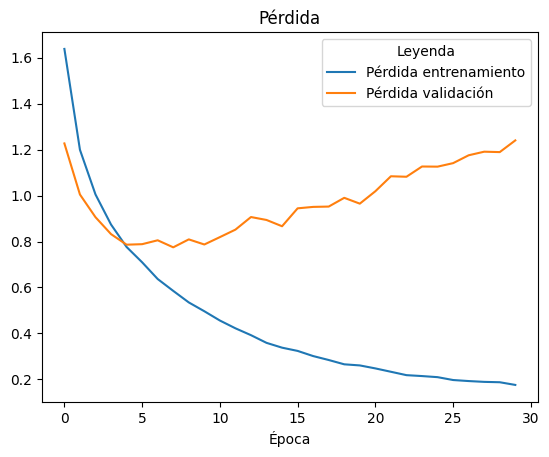

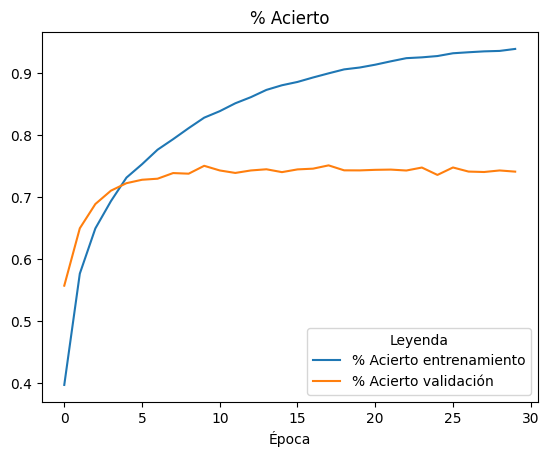

In [ ]:
plt.plot(hist3.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist3.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

plt.plot(hist3.history['accuracy'], label='% Acierto entrenamiento')
plt.plot(hist3.history['val_accuracy'], label='% Acierto validación')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

###Comparación relu

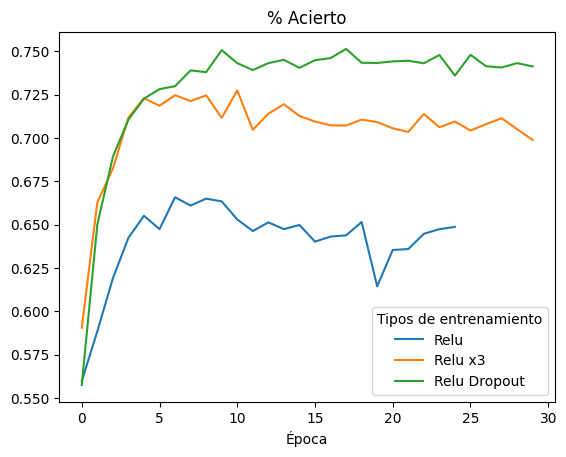

In [ ]:
plt.plot(hist.history['val_accuracy'], label = 'Relu')
plt.plot(hist2.history['val_accuracy'], label = 'Relu x3')
plt.plot(hist3.history['val_accuracy'], label = 'Relu Dropout')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Tipos de entrenamiento')
plt.show()

### Tanh - Convulucional, Max pooling, Densa(256) y Densa(10)

In [ ]:
red_conv_tanh = keras.Sequential()
red_conv_tanh.add(Conv2D(256, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='tanh'))
red_conv_tanh.add(MaxPool2D((2,2)))
red_conv_tanh.add(Flatten())
red_conv_tanh.add(Dense(256, activation='tanh'))
red_conv_tanh.add(Dense(10, activation='softmax'))

red_conv_tanh.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_7 (Dense)             (None, 256)               14745856  
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,755,594
Trainable params: 14,755,594
Non-trainable params: 0
__________________________________________

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
red_conv_tanh.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

hist_tanh = red_conv_tanh.fit(
    x_train,y_train,
    batch_size=100,
    epochs=25,
    validation_data=(x_test,y_test),
    callbacks = [callback]
)

Epoch 1/25
500/500 [==============================] - 10s 16ms/step - loss: 1.6514 - accuracy: 0.4499 - val_loss: 1.4446 - val_accuracy: 0.4957
Epoch 2/25
500/500 [==============================] - 8s 15ms/step - loss: 1.2008 - accuracy: 0.5789 - val_loss: 1.2282 - val_accuracy: 0.5663
Epoch 3/25
500/500 [==============================] - 7s 15ms/step - loss: 1.0233 - accuracy: 0.6446 - val_loss: 1.1628 - val_accuracy: 0.5914
Epoch 4/25
500/500 [==============================] - 8s 15ms/step - loss: 0.8858 - accuracy: 0.6940 - val_loss: 1.0911 - val_accuracy: 0.6226
Epoch 5/25
500/500 [==============================] - 8s 15ms/step - loss: 0.7693 - accuracy: 0.7379 - val_loss: 1.1351 - val_accuracy: 0.6103
Epoch 6/25
500/500 [==============================] - 7s 15ms/step - loss: 0.6740 - accuracy: 0.7722 - val_loss: 1.1296 - val_accuracy: 0.6226
Epoch 7/25
500/500 [==============================] - 8s 15ms/step - loss: 0.5761 - accuracy: 0.8085 - val_loss: 1.1349 - val_accuracy: 0.626

En esta red se aplico el EarlyStopping ya que si se dejaban muchas epocas la epoca final daba un mal resultado

####Grafico

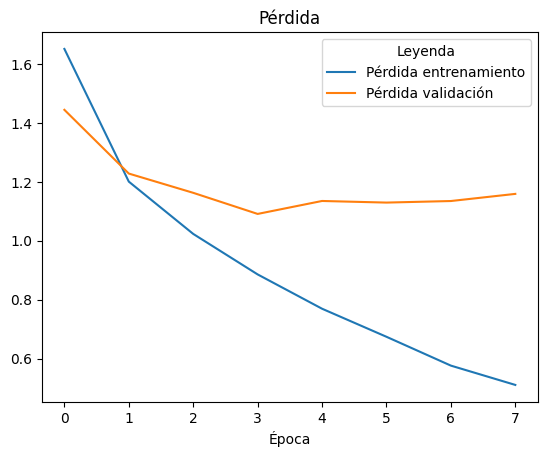

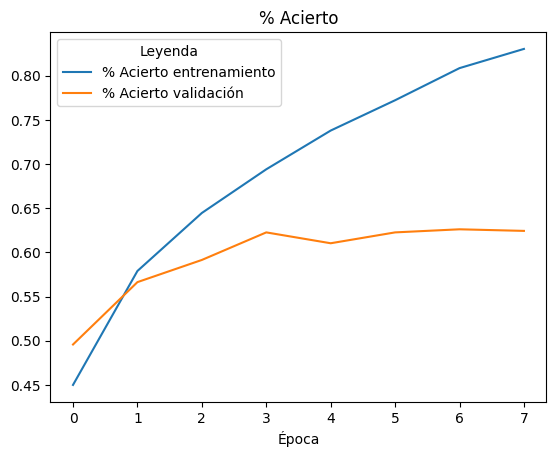

In [ ]:
plt.plot(hist_tanh.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist_tanh.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

plt.plot(hist_tanh.history['accuracy'], label='% Acierto entrenamiento')
plt.plot(hist_tanh.history['val_accuracy'], label='% Acierto validación')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

### Tanh - Convulucional x3 , Max pooling, Densa(256) y Densa(10) Sobreentrenamiento

In [ ]:
red_conv_tanh2 = keras.Sequential()
red_conv_tanh2.add(Conv2D(256, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='tanh'))
red_conv_tanh2.add(Conv2D(128, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='tanh'))
red_conv_tanh2.add(MaxPool2D((2,2)))
red_conv_tanh2.add(Conv2D(64, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='tanh'))
red_conv_tanh2.add(MaxPool2D((2,2)))
red_conv_tanh2.add(Flatten())
red_conv_tanh2.add(Dense(256, activation='tanh'))
red_conv_tanh2.add(Dense(10, activation='softmax'))

red_conv_tanh2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)             

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
red_conv_tanh2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

hist_tanh2 = red_conv_tanh2.fit(
    x_train,y_train,
    batch_size=100,
    epochs=25,
    validation_data=(x_test,y_test),
    callbacks = [callback]
)

Epoch 1/25
500/500 [==============================] - 19s 33ms/step - loss: 1.3820 - accuracy: 0.5147 - val_loss: 1.0690 - val_accuracy: 0.6281
Epoch 2/25
500/500 [==============================] - 16s 32ms/step - loss: 0.9682 - accuracy: 0.6633 - val_loss: 0.9595 - val_accuracy: 0.6669
Epoch 3/25
500/500 [==============================] - 16s 33ms/step - loss: 0.7819 - accuracy: 0.7280 - val_loss: 0.9194 - val_accuracy: 0.6747
Epoch 4/25
500/500 [==============================] - 16s 33ms/step - loss: 0.6312 - accuracy: 0.7828 - val_loss: 0.8583 - val_accuracy: 0.7071
Epoch 5/25
500/500 [==============================] - 17s 33ms/step - loss: 0.5072 - accuracy: 0.8271 - val_loss: 0.8204 - val_accuracy: 0.7222
Epoch 6/25
500/500 [==============================] - 16s 33ms/step - loss: 0.3902 - accuracy: 0.8709 - val_loss: 0.8848 - val_accuracy: 0.7073
Epoch 7/25
500/500 [==============================] - 16s 33ms/step - loss: 0.2820 - accuracy: 0.9123 - val_loss: 0.9453 - val_accuracy:

####Grafico

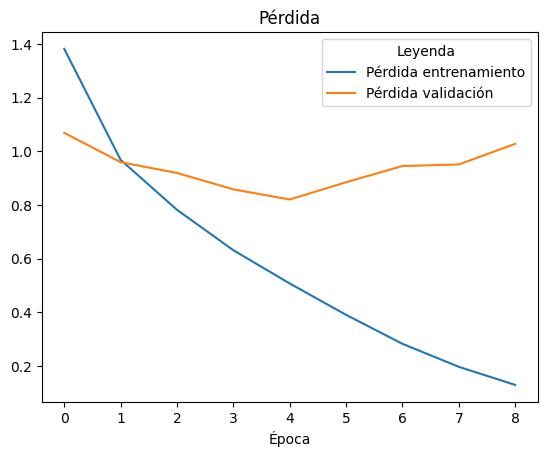

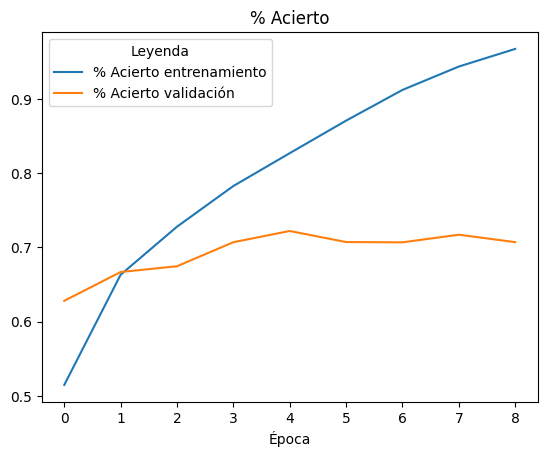

In [ ]:
plt.plot(hist_tanh2.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist_tanh2.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

plt.plot(hist_tanh2.history['accuracy'], label='% Acierto entrenamiento')
plt.plot(hist_tanh2.history['val_accuracy'], label='% Acierto validación')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

### Tanh - Convulucional x3, Max pooling, Densa(256), Densa(128), Densa(10) Con 2 Dropout de 0.3

In [ ]:
red_conv_tanh3 = keras.Sequential()
red_conv_tanh3.add(Conv2D(256, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='tanh'))
red_conv_tanh3.add(Conv2D(128, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='tanh'))
red_conv_tanh3.add(MaxPool2D((2,2)))
red_conv_tanh3.add(Conv2D(64, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='tanh'))
red_conv_tanh3.add(MaxPool2D((2,2)))
red_conv_tanh3.add(Flatten())
red_conv_tanh3.add(Dense(256, activation='tanh'))
red_conv_tanh3.add(keras.layers.Dropout(0.3))
red_conv_tanh3.add(Dense(128, activation='tanh'))
red_conv_tanh3.add(keras.layers.Dropout(0.3))
red_conv_tanh3.add(Dense(10, activation='tanh'))

red_conv_tanh3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 256)       7168      
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2304)             

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
red_conv_tanh3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

hist_tanh3 = red_conv_tanh3.fit(
    x_train,y_train,
    batch_size=100,
    epochs=25,
    validation_data=(x_test,y_test)
)

Epoch 1/25
500/500 [==============================] - 19s 33ms/step - loss: 3.5200 - accuracy: 0.0998 - val_loss: 3.4832 - val_accuracy: 0.1000
Epoch 2/25
500/500 [==============================] - 16s 32ms/step - loss: 3.4860 - accuracy: 0.1000 - val_loss: 3.4832 - val_accuracy: 0.1000
Epoch 3/25
500/500 [==============================] - 16s 33ms/step - loss: 3.4830 - accuracy: 0.1000 - val_loss: 3.4833 - val_accuracy: 0.1000
Epoch 4/25
500/500 [==============================] - 16s 32ms/step - loss: 3.4831 - accuracy: 0.1000 - val_loss: 3.4833 - val_accuracy: 0.1000
Epoch 5/25
500/500 [==============================] - 16s 33ms/step - loss: 3.4832 - accuracy: 0.1000 - val_loss: 3.4832 - val_accuracy: 0.1000
Epoch 6/25
500/500 [==============================] - 16s 32ms/step - loss: 3.4832 - accuracy: 0.1000 - val_loss: 3.4833 - val_accuracy: 0.1000
Epoch 7/25
500/500 [==============================] - 16s 33ms/step - loss: 3.4834 - accuracy: 0.1000 - val_loss: 3.4833 - val_accuracy:

####Grafico

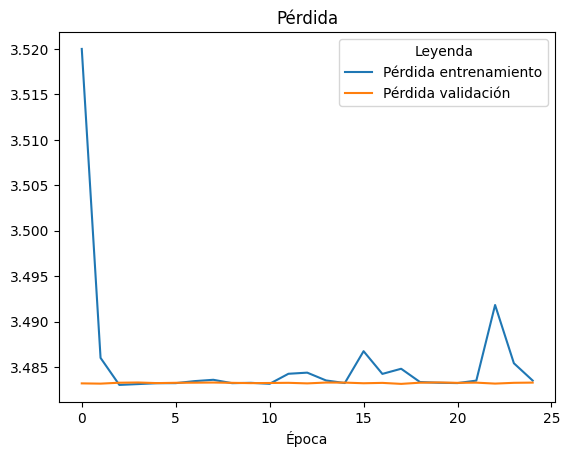

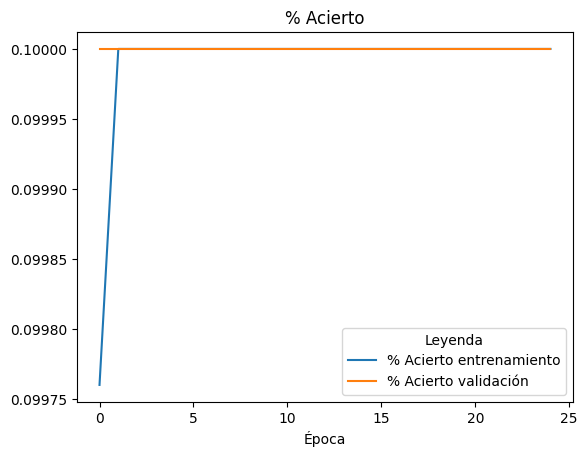

In [ ]:
plt.plot(hist_tanh3.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist_tanh3.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

plt.plot(hist_tanh3.history['accuracy'], label='% Acierto entrenamiento')
plt.plot(hist_tanh3.history['val_accuracy'], label='% Acierto validación')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Leyenda')
plt.show()

###Comparacion Tanh

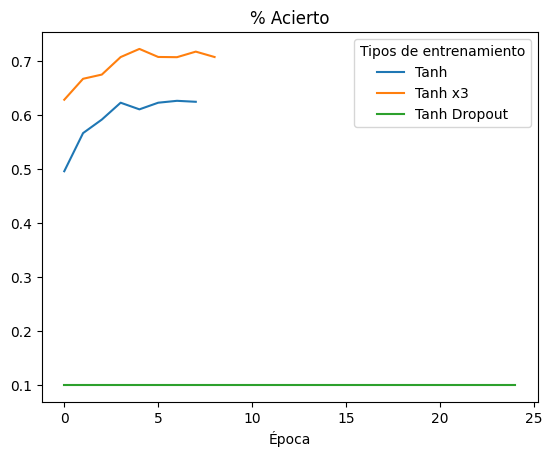

In [ ]:
plt.plot(hist_tanh.history['val_accuracy'], label = 'Tanh')
plt.plot(hist_tanh2.history['val_accuracy'], label = 'Tanh x3')
plt.plot(hist_tanh3.history['val_accuracy'], label = 'Tanh Dropout')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Tipos de entrenamiento')
plt.show()

##Comparación de todas las redes

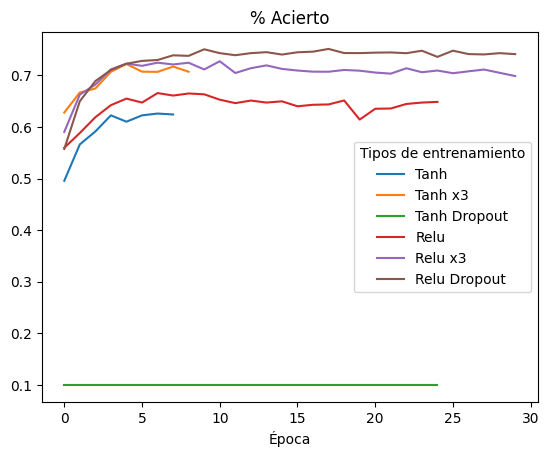

In [ ]:
plt.plot(hist_tanh.history['val_accuracy'], label = 'Tanh')
plt.plot(hist_tanh2.history['val_accuracy'], label = 'Tanh x3')
plt.plot(hist_tanh3.history['val_accuracy'], label = 'Tanh Dropout')
plt.plot(hist.history['val_accuracy'], label = 'Relu')
plt.plot(hist2.history['val_accuracy'], label = 'Relu x3')
plt.plot(hist3.history['val_accuracy'], label = 'Relu Dropout')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Tipos de entrenamiento')
plt.show()